In [59]:
import numpy as np
import pandas as pd #データ処理用のライブラリ

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy.optimize import curve_fit #統計処理用のライブラリ

In [60]:
rcParams['figure.figsize'] = 10, 10
rcParams['font.family'] = 'Times New Roman' # font familyの設定
rcParams['mathtext.fontset'] = 'stix' # math fontの設定

<img src='./eoverm/eoverm.png' width='50%'>

In [ ]:
I=np.array([1.3,1.5,1.7]) #磁場の強さを固定した実験結果のインデックス
V=np.array([140,150,180]) #電子の速度を固定した実験結果のインデックス

### csvファイルの取り込み

In [62]:
f1={} # empty dictionary
f2={}

for i in I:
    f1[i]=pd.read_csv(f'./eoverm/eoverm_ifixed_i{i}.csv')
for v in V:
    f2[v]=pd.read_csv(f'./eoverm/eoverm_vfixed_v{v}.csv')

In [63]:
f1[1.3]

,V,2R
0,120,5.398
1,150,6.830
2,180,7.638
3,200,8.015
4,220,8.813
5,240,9.065


In [64]:
f2[140]

,I,2R
0,1.1,6.100
1,1.2,5.792
2,1.3,5.398
3,1.5,4.765
4,1.6,4.204
5,1.7,4.114
6,1.8,3.719


### 値の参照の仕方

In [7]:
# Accessing specific data in the DataFrame
f1[1.3]['V']

0    120
1    150
2    180
3    200
4    220
5    240
Name: V, dtype: int64

In [8]:
# Accessing specific data in the DataFrame as a NumPy array
f1[1.3]['V'].values

array([120, 150, 180, 200, 220, 240])

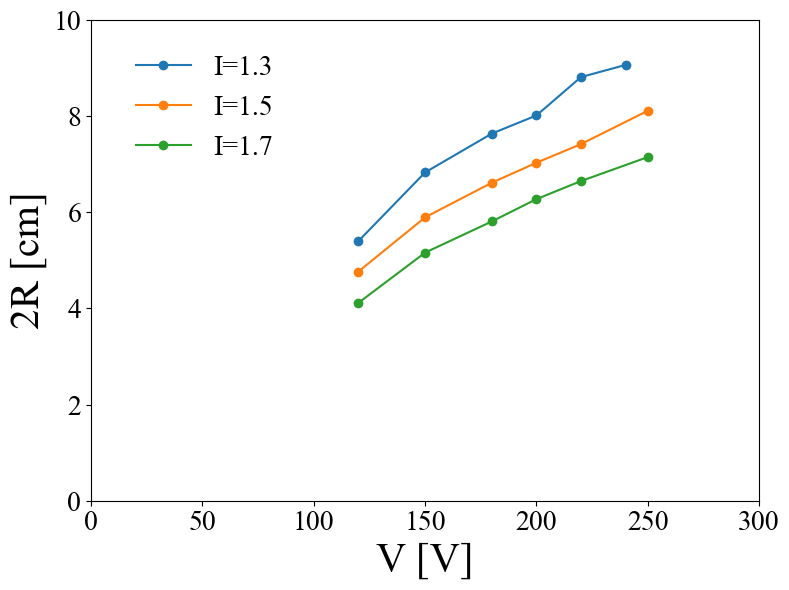

In [69]:
r=1.
fig, ax = plt.subplots(figsize=(r*8,r*6))
ax.set_xlim(0,300)
ax.set_ylim(0,10)
ax.set_xlabel(r'V [V]', fontsize=30)
ax.set_ylabel(r"2R [cm]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

marker='o'

for i in I:
    label=f'I={i}'
    x=f1[i]['V']
    y=f1[i]['2R']
    ax.plot(x,y,'-',marker=marker,label=label)


#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


## 問　もう一つのファイルについて横軸を電流, 縦軸を直径としたグラフを作成せよ。

In [10]:
### ここにグラフを描くコードを追加
















# 最小二乗法を用いて、e/mを求める。

## 2V=(e/m) * (B^2) * (r^2)

In [72]:
# B2R2の計算

for i in I:
    B=7.8*10**(-4)*i
    r=f1[i]['2R']*10**(-2)/(2.0) # 2Rをmに変換して半径にする
    f1[i]['B2R2']=B**2*r**2 #列の追加


In [73]:
f1[1.3]

,V,2R,B2R2
0,120,5.398,7.489998e-10
1,150,6.830,1.199105e-09
2,180,7.638,1.499599e-09
3,200,8.015,1.651289e-09
4,220,8.813,1.996473e-09
5,240,9.065,2.112280e-09


## 2V=(e/m) * (B^2) * (r^2) をプロットする

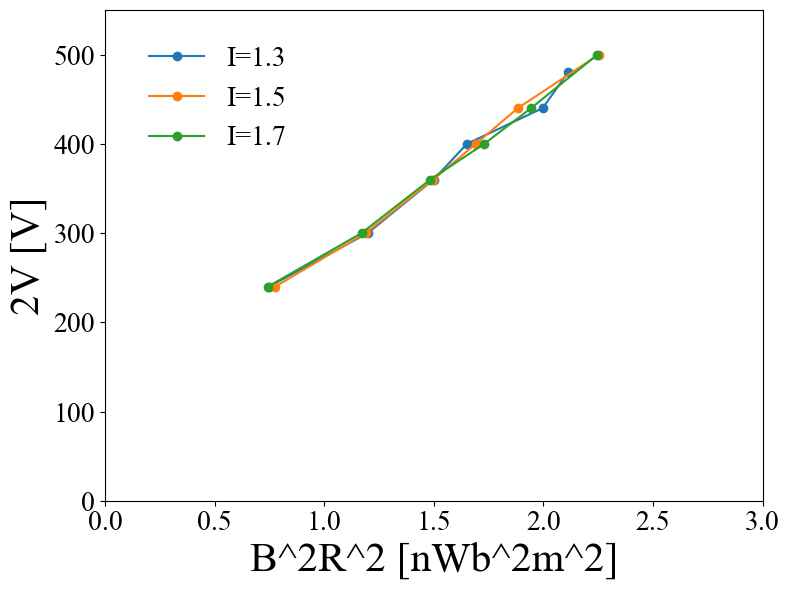

In [74]:
r=1.
fig, ax = plt.subplots(figsize=(r*8,r*6))
ax.set_xlim(0,3)
ax.set_ylim(0,550)
ax.set_xlabel(r'B^2R^2 [nWb^2m^2]', fontsize=30)
ax.set_ylabel(r"2V [V]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

marker='o'

for i in I:
    label=f'I={i}'
    x=f1[i]['B2R2']*10**(9)  # Convert to nWb^2m^2
    y=2*f1[i]['V']
    ax.plot(x,y,'-',marker=marker,label=label)


#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


In [75]:
# フィットする関数を定義
def func(x, a, b):
    return a*x+b

In [76]:
#(非線形)最小二乗法でフィッティング
popt={}
pcov={}

for i in I:
    v=2.0*f1[i]['V']
    B2R2=f1[i]['B2R2']
    popt[i], pcov[i] = curve_fit(func, B2R2, v, p0=[2*10**(11), 150])  # 初期値を設定


In [77]:
popt

{1.3: array([1.74464279e+11, 1.02262865e+02]),
 1.5: array([1.80935188e+11, 9.31170717e+01]),
 1.7: array([1.73711278e+11, 1.03506213e+02])}

# e/mの文献値は1.758820 × 10^11 C/kg

### 重ねてプロットする

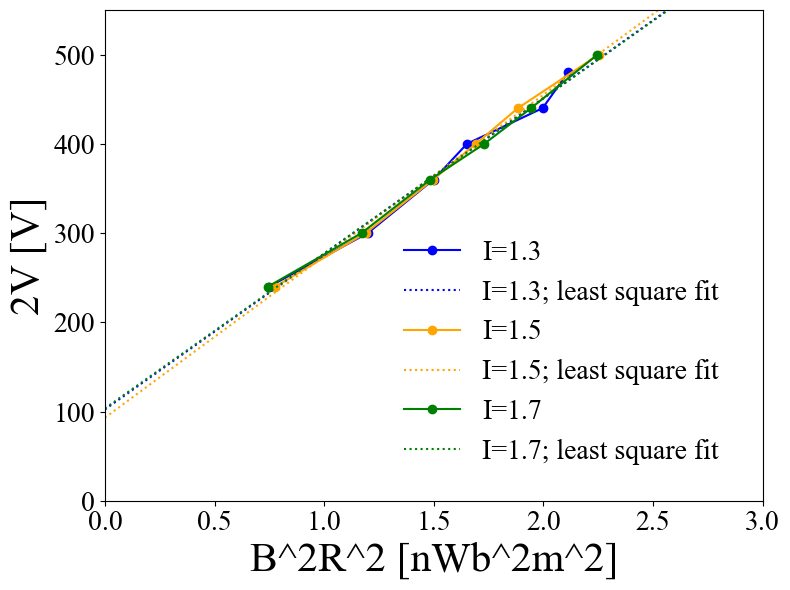

In [78]:
r=1.
fig, ax = plt.subplots(figsize=(r*8,r*6))
ax.set_xlim(0,3)
ax.set_ylim(0,550)
ax.set_xlabel(r'B^2R^2 [nWb^2m^2]', fontsize=30)
ax.set_ylabel(r"2V [V]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

marker='o'
marker2='s'
x0=np.arange(100)*10**(-10)
color={1.3:'blue', 1.5:'orange', 1.7:'green'}

for i in I:
    label=f'I={i}'
    x=f1[i]['B2R2']*10**(9)  # Convert to nWb^2m^2
    y=2*f1[i]['V']
    ax.plot(x,y,'-',marker=marker,color=color[i],label=label)

    label=f'I={i}; least square fit'
    y=func(x0, *popt[i])
    x0=x0*10**(9)  # Convert to nWb^2m^2
    ax.plot(x0,y,':',color=color[i],label=label)

#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.95,0.05), loc='lower right', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


In [81]:
#(非線形)最小二乗法でフィッティング

x=np.array([]) #空のNumPy配列を作成
y=np.array([]) #空のNumPy配列を作成

for i in I:
    x=np.append(x, f1[i]['B2R2'])
    y=np.append(y, 2.0*f1[i]['V'])
    
popt, pcov = curve_fit(func, x, y, p0=[2*10**(11), 150])  # 初期値を設定


In [82]:
popt[0]/10**11,np.sqrt(pcov[0,0])/10**11

(1.7632969078567802, 0.03601803911043921)

## e/m=(1.76 \pm 0.03) \times 10^{11} C/kg

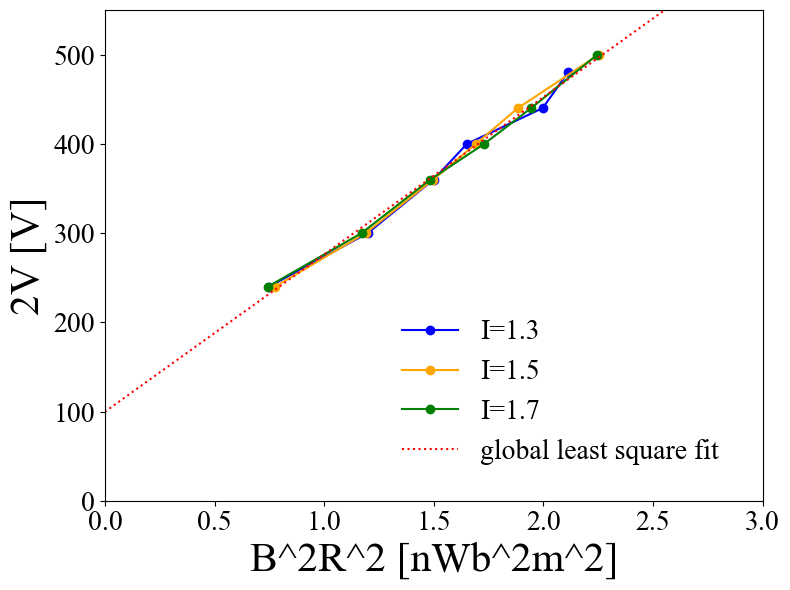

In [83]:
r=1.
fig, ax = plt.subplots(figsize=(r*8,r*6))
ax.set_xlim(0,3)
ax.set_ylim(0,550)
ax.set_xlabel(r'B^2R^2 [nWb^2m^2]', fontsize=30)
ax.set_ylabel(r"2V [V]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

marker='o'
marker2='s'
x0=np.arange(100)*10**(-10)
color={1.3:'blue', 1.5:'orange', 1.7:'green'}

for i in I:
    label=f'I={i}'
    x=f1[i]['B2R2']*10**(9)  # Convert to nWb^2m^2
    y=2*f1[i]['V']
    ax.plot(x,y,'-',marker=marker,color=color[i],label=label)

label=f'global least square fit'
y=func(x0, *popt)
x0=x0*10**(9)  # Convert to nWb^2m^2
ax.plot(x0,y,':',color='red',label=label)

#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.95,0.05), loc='lower right', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


## 2V=(e/m) * (B^2) * (r^2)

## 問　f2について横軸B2, 2V/R2を計算して追加せよ。

In [ ]:
### ここにf2へB^2と2v/R^2を追加するコードを書く
















## 問　f2について横軸をB^2, 縦軸を2V/R^2としたグラフを作成せよ。

In [ ]:
### ここにグラフを描くコードを追加
















## 問　e/mを最小二乗法で推定せよ。

In [ ]:
### ここに最小二乗法のコードを追加
















### 最小二乗法の結果を実験データとともにプロットせよ

In [ ]:
### ここにグラフを描くコードを追加





















## 2V/(B^2)=(e/m) * (r^2)

## 問　f2にr^2及び2V/B^2を追加せよ

In [ ]:
### ここにf2へR^2と2v/B^2を追加するコードを書く
















## 問　2V/B^2=(e/m) *  (r^2) をプロットせよ

In [91]:
### ここにグラフを描くコードを追加
















## 問　e/mを最小二乗法で推定せよ。

In [ ]:
### ここに最小二乗法のコードを追加














